In [114]:
import pandas
import numpy
from theano import config
%matplotlib inline
import matplotlib.pyplot as plt

BASEPATH = '../data/'

In [94]:
from fuel.datasets.hdf5 import H5PYDataset

train_set = H5PYDataset(
    '../data/data.hdf5',
    which_sets=('train',),
    load_in_memory=True
)

In [103]:
from fuel.schemes import ShuffledScheme
from fuel.streams import DataStream


train_stream = DataStream.default_stream(
    train_set,
    iteration_scheme=ShuffledScheme(train_set.num_examples, batch_size=5000)
)
ei = train_stream.get_epoch_iterator()
print train_set.provides_sources

In [105]:
d = next(ei)

# prime vs has car

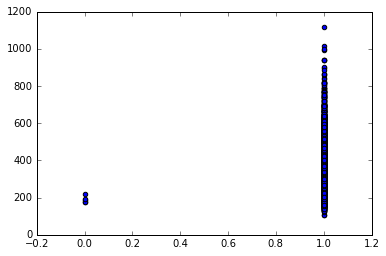

In [108]:
plt.scatter(d[3], d[-1])

# prime vs features nocar

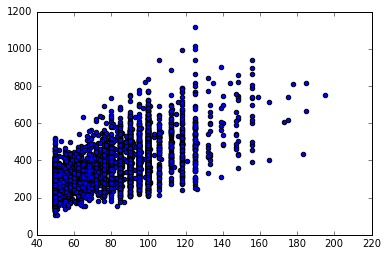

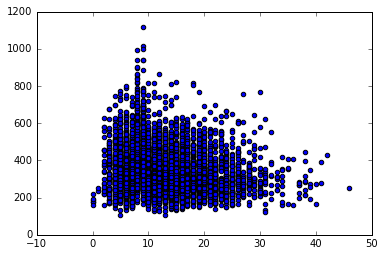

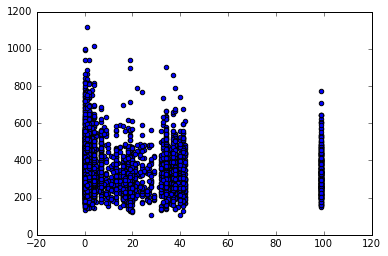

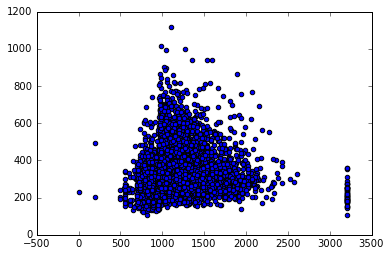

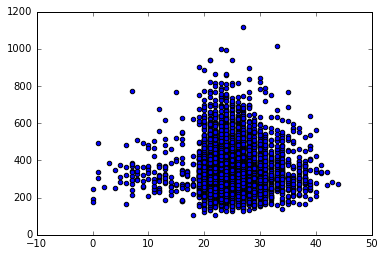

In [112]:
# prime vs feat nocar 
for i in range(d[5].shape[1]):
    plt.scatter(d[5][:,i], d[-1])
    plt.show()

# prime vs feat car

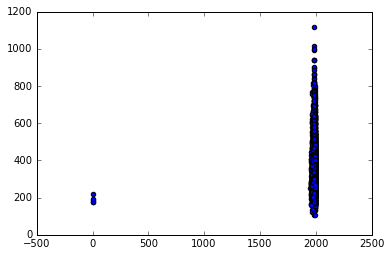

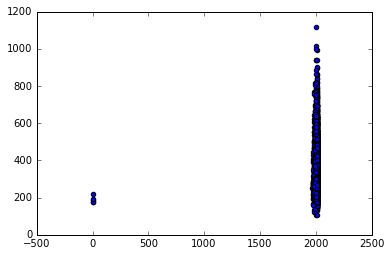

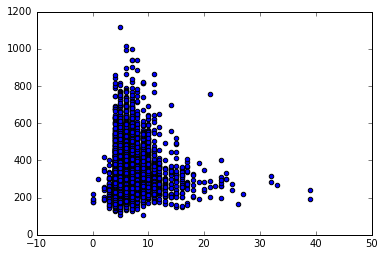

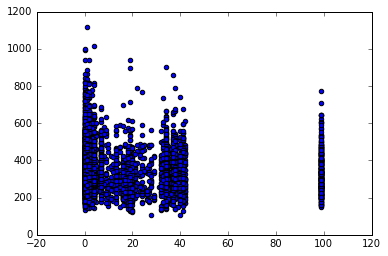

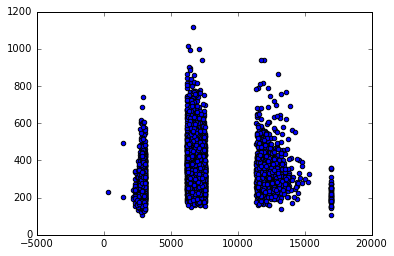

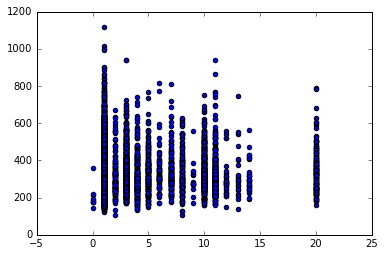

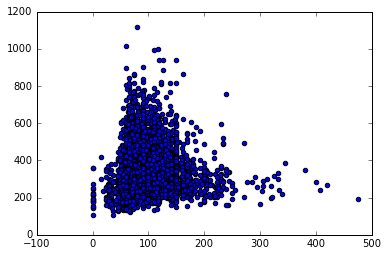

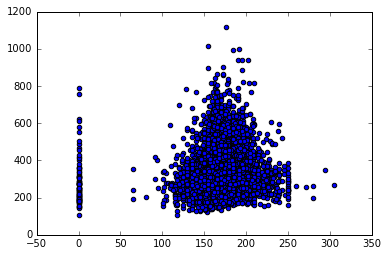

In [113]:
for i in range(d[2].shape[1]):
    plt.scatter(d[2][:,i], d[-1])
    plt.show()

# frequencies for code postaux

In [115]:
print('Computing mean target values')
cps = []
primes = []
cp_index = train_set.provides_sources.index('codepostal')
prime_index = train_set.provides_sources.index('labels')

for d in train_stream.get_epoch_iterator():
    cps.append(d[cp_index])
    primes.append(d[prime_index])

cps = numpy.array(cps).flatten()
primes = numpy.array(primes).flatten()

means = []
freqs = []
s = 0 
for cp in range(len(numpy.unique(cps))):
    freqs.append((cps==cp).sum())
    means.append(primes[cps==cp].mean()) 
means = numpy.array(means).astype(config.floatX)


Computing mean target values


/home/thomas/anaconda3/envs/ift6266/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


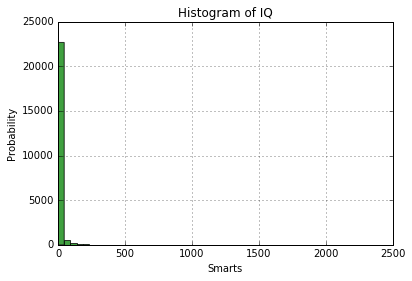

In [116]:
# the histogram of the data
n, bins, patches = plt.hist(freqs, 50, normed=0, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([0, 2500, 0, 0.003])
plt.grid(True)
plt.show()